In [1]:
# ASTR 400B Homework 5
# Nicolas Mazziotti

import numpy as np 
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.constants import G

from MassProfile import MassProfile
from GalaxyMass import ComponentMass

In [2]:
# Construct mass profile objects for MW, M31, and M33 at snap 0 
MW = MassProfile('MW', 0)
M31 = MassProfile('M31', 0)
M33 = MassProfile('M33', 0)

# Define array of radial distances (kpc) from galaxy COM position 
r = np.arange(0.25, 30.5, 0.25) * u.kpc

In [3]:
def PlotMassProfile(Gal, r):
    """
        Function that plots the mass profile of a galaxy as a function of radius for the component masses 
        (Halo, Disk, Bulge) and the total mass 
        
    INPUTS:
        Gal (MassProfile object): MassProfile object constructed for the galaxy of interest containing the 
            mass information in astropy units of Msun 
        r (numpy array of astropy quantities): Array of radial distances in kpc 
        
    OUTPUTS:
        Matplotlib plot of mass (Msun) versus radius (kpc)
    """
 
    Gal_HaloRMass = Gal.MassEnclosed(r, 1) # Radial mass profile of the halo mass
    Gal_DiskRMass = Gal.MassEnclosed(r, 2) # Radial mass profile of the disk mass
    Gal_BulgeRMass = Gal.MassEnclosed(r, 3) # Radial mass profile of the bulge mass

    Gal_TotalRMass = Gal.TotalMassEnclosed(r)  # Radial mass profile of the total mass

    # Plot curves for each mass component 
    # Halo mass profile = red dashed line
    # Disk mass profile = blue dotted line
    # Bulge mass profile = green dashed-dotted line 
    plt.plot(r, Gal_HaloRMass, c='red', linestyle='--', label=Gal.gname + ' Halo')
    plt.plot(r, Gal_DiskRMass, c='blue', linestyle=':', label=Gal.gname + ' Disk')
    
    if Gal.gname != 'M33': # note: M33 does not have a bulge component 
        plt.plot(r, Gal_BulgeRMass, c='green', linestyle='-.', label=Gal.gname + ' Bulge')

    # Plot curve for total mass profile 
    plt.plot(r, Gal_TotalRMass, c='black', label=Gal.gname + ' Total')
    
    # Add axis labels and title  
    plt.title(Gal.gname + " Mass Profile")
    plt.xlabel("Radius [kpc]")
    plt.ylabel(r"Mass [$M_{\odot}$]")
    
    # Use log scale for mass 
    plt.semilogy()
    
    plt.legend()

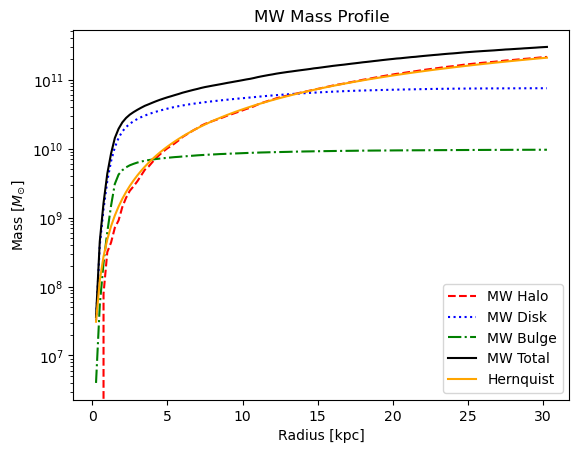

In [4]:
# Plot all mass profiles for MW simultaneously 
PlotMassProfile(MW, r)

# Calculate total halo mass of MW to use for Hernquist profile 
MW_TotalHaloMass = ComponentMass(MW.filename, 1) * 1e12 * u.Msun

# Guess MW scale radius in kpc until Hernquist profile matches halo mass profile on plot 
a_MW = 63*u.kpc

# Compute radial mass profile of MW halo using the Hernquist model 
MW_HernquistRMass = MW.HernquistMass(r, a_MW, MW_TotalHaloMass)

# Add Hernquist profile to plot as an orange solid line
plt.plot(r, MW_HernquistRMass, c='orange', label='Hernquist')

plt.legend()
plt.savefig('MW_MassProfile.png')

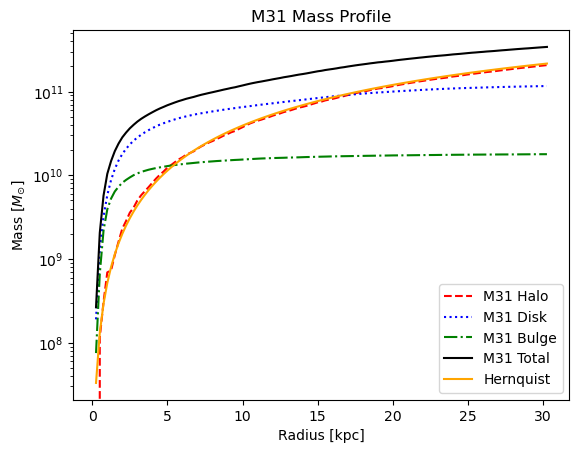

In [5]:
# Plot all mass profiles for M31 simultaneously 
PlotMassProfile(M31, r)

# Calculate total halo mass of M31 to use for Hernquist profile 
M31_TotalHaloMass = ComponentMass(M31.filename, 1) * 1e12 * u.Msun

# Guess M31 scale radius in kpc until Hernquist profile matches halo mass profile on plot 
a_M31 = 60*u.kpc

# Compute radial mass profile of M31 halo using the Hernquist model 
M31_HernquistModel = M31.HernquistMass(r, a_M31, M31_TotalHaloMass)

# Add Hernquist profile to plot as an orange solid line
plt.plot(r, M31_HernquistModel, c='orange', label='Hernquist')

plt.legend()
plt.savefig('M31_MassProfile.png')

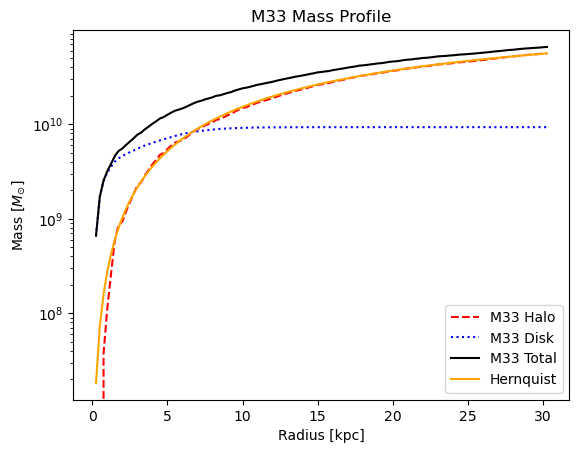

In [6]:
# Plot all mass profiles for M33 simultaneously 
PlotMassProfile(M33, r)

# Calculate total halo mass of M33 to use for Hernquist profile 
M33_TotalHaloMass = ComponentMass(M33.filename, 1) * 1e12 * u.Msun

# Guess M33 scale radius in kpc until Hernquist profile matches halo mass profile on plot 
a_M33 = 25*u.kpc

# Compute radial mass profile of M33 halo using the Hernquist model 
M33_HernquistModel = M33.HernquistMass(r, a_M33, M33_TotalHaloMass)

# Add Hernquist profile to plot as an orange solid line
plt.plot(r, M33_HernquistModel, c='orange', label='Hernquist')

plt.legend()
plt.savefig('M33_MassProfile.png')

In [7]:
def PlotVCircProfile(Gal, r):
    """
        Function that plots the circular velocity profile of a galaxy as a function of radius 
        created by the component masses (Halo, Disk, Bulge) and then the total mass 
        
    INPUTS:
        Gal (MassProfile object): MassProfile object constructed for the galaxy of interest containing the 
            mass information in astropy units of Msun 
        r (numpy array of astropy quantities): Array of radial distances in kpc 
        
    OUTPUTS:
        Matplotlib plot of circular velocity (km/s) versus radius (kpc)
    """
    
    # Compute radial circular velocity profile for each mass component 
    Gal_HaloRVCirc = Gal.CircularVelocity(r, 1) # circular velocity due to halo mass only
    Gal_DiskRVCirc = Gal.CircularVelocity(r, 2) # circular velocity due to disk mass only
    Gal_BulgeRVCirc = Gal.CircularVelocity(r, 3) # circular velocity due to bulge mass only

    # Compute radial circular velocity profile due to the total mass enclosed
    Gal_TotalRVCirc = Gal.TotalCircularVelocity(r)

    # Plot profiles using same plotting conventions as PlotMassProfile
    plt.plot(r, Gal_HaloRVCirc, c='red', linestyle='--', label=Gal.gname + ' Halo')
    plt.plot(r, Gal_DiskRVCirc, c='blue', linestyle=':', label=Gal.gname + ' Disk')
    if Gal.gname != 'M33':
        plt.plot(r, Gal_BulgeRVCirc, c='green', linestyle='-.', label=Gal.gname + ' Bulge')
    
    # Profile for total mass 
    plt.plot(r, Gal_TotalRVCirc, c='black', label=Gal.gname + ' Total')
    
    # Add axis labels and title
    plt.title(Gal.gname + " Circular Velocity Profile")
    plt.xlabel("Radius [kpc]")
    plt.ylabel(r"$v_{circ}$ [km/s]")
    
    plt.legend()

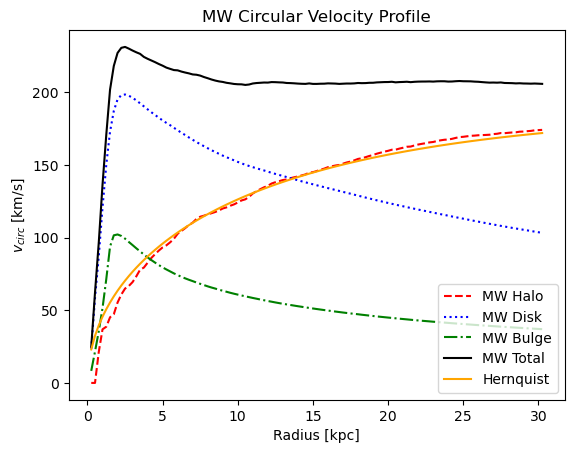

In [8]:
# Plot all circular velocity profiles simultaneously for MW
PlotVCircProfile(MW, r)

#a_MW = 63*u.kpc commented out in case modification from value set earlier is not needed

# Compute circular velocity profile according to Hernquist mass 
MW_HernquistRVCirc = MW.HernquistVCirc(r, a_MW, MW_TotalHaloMass)

# Add Hernquist profile to plot as an orange solid line
plt.plot(r, MW_HernquistRVCirc , c='orange', label='Hernquist')

plt.legend()
plt.savefig('MW_VCircProfile.png')

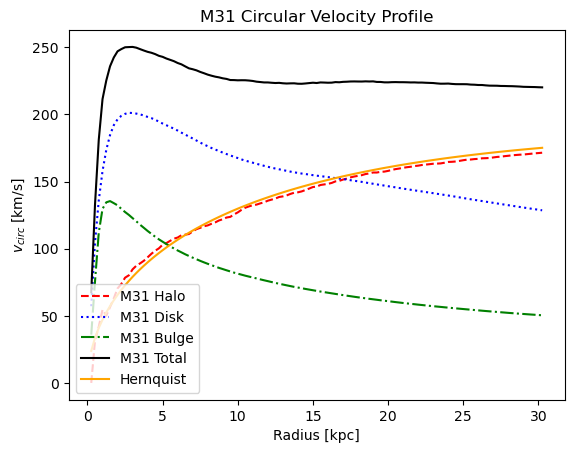

In [9]:
# Plot all circular velocity profiles simultaneously for M31
PlotVCircProfile(M31, r)

#a_M31 = 60*u.kpc commented out in case modification from value set earlier is not needed

# Compute circular velocity profile according to Hernquist mass 
M31_HernquistRVCirc = M31.HernquistVCirc(r, a_M31, M31_TotalHaloMass)

# Add Hernquist profile to plot as an orange solid line
plt.plot(r, M31_HernquistRVCirc , c='orange', label='Hernquist')

plt.legend()
plt.savefig('M31_VCircProfile.png')

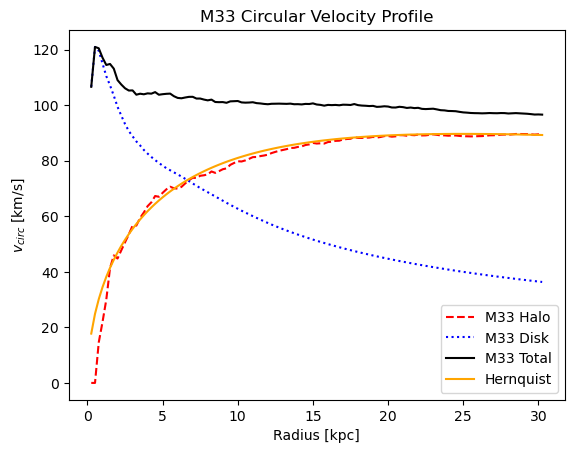

In [10]:
# Plot all circular velocity profiles simultaneously for M33 
PlotVCircProfile(M33, r)

#a_M33 = 25*u.kpc commented out in case modification from value set earlier is not needed

# Compute circular velocity profile according to Hernquist mass
M33_HernquistRVCirc = M33.HernquistVCirc(r, a_M33, M33_TotalHaloMass)

# Add Hernquist profile to plot as an orange solid line
plt.plot(r, M33_HernquistRVCirc , c='orange', label='Hernquist')

plt.legend()
plt.savefig('M33_VCircProfile.png')